In [74]:
import pandas as pd  # also install lxml
import requests
import polaris as po
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
results_dict = {
    "polaris/pkis2-ret-wt-cls-v2": 0.40452319234389633,
    "biogen/adme-fang-solu-reg-v1": 0.2863188565583724,
    "biogen/adme-fang-rppb-reg-v1": 0.47350364048162064,
    "biogen/adme-fang-hppb-reg-v1": 0.4414061462246851,
    "biogen/adme-fang-perm-reg-v1": 0.40705892742032196,
    "biogen/adme-fang-rclint-reg-v1": 0.366672811120597,
    "biogen/adme-fang-hclint-reg-v1": 0.3743406101080227,
    "tdcommons/clearance-microsome-az": 0.028754002994228332,
    "tdcommons/dili": 0.7430434782608696,
    "tdcommons/bioavailability-ma": 0.6504822081809112,
    "tdcommons/vdss-lombardo": 0.26970185798353713,
    "tdcommons/herg": 0.7191458026509573
}

In [76]:
best_models = {}

In [77]:
metadata = {}

In [78]:
for benchmark_name in results_dict.keys():
    benchmark = po.load_benchmark(benchmark_name)
    response = requests.get(f'https://polarishub.io/benchmarks/{benchmark_name}')
    results_table = pd.read_html(response.text)[0]
    best = results_table[benchmark.main_metric.label][0]
    if isinstance(best, str):
        best = 0.0
    best_models[benchmark_name] = best
    metadata[benchmark_name] = {
        "metric": benchmark.main_metric.label,
        "best_name": results_table['Name'][0],
    }

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[2025-03-24 13:45:54] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=84803;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=226273;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=873589;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=326807;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:45:54]  Success: Fetching dataset                                                                 ]8;id=977209;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=406005;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=477617;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=155703;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=625314;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=987305;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=749832;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=310330;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:45:57] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=477665;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=822055;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=834678;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=551274;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:45:57]  Success: Fetching dataset                                                                 ]8;id=901810;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=811652;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=263110;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=453426;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=182662;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=671788;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=455278;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=25273;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:00] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=803490;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=119349;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=89231;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=97310;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:00]  Success: Fetching dataset                                                                 ]8;id=31455;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=663549;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=833806;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=187214;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=418020;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=721385;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=691630;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=881244;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:02] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=674267;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=35881;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=781344;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=996424;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:02]  Success: Fetching dataset                                                                 ]8;id=446486;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=645573;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=924566;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=79603;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=99267;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=796041;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=266027;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=544452;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:04] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=875615;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=792377;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=576658;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=965543;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:04]  Success: Fetching dataset                                                                 ]8;id=223559;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=785165;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=411749;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=486336;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=432272;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=685297;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=599870;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=653794;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:06] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=106334;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=807396;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=259779;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=474637;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:06]  Success: Fetching dataset                                                                 ]8;id=587184;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=252539;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=387604;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=841893;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=609685;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=453785;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=791953;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=17210;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:08] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=445812;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=779755;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=703452;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=205016;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:08]  Success: Fetching dataset                                                                 ]8;id=470982;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=380585;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=678957;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=473671;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=985173;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=693380;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=896120;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=724511;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[2025-03-24 13:46:11] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=416396;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=238075;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=762353;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=522739;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:11]  Success: Fetching dataset                                                                 ]8;id=886855;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=549887;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=581042;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=573273;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=808621;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=281251;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=63690;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=539586;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:13] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=316773;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=213178;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=768969;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=284242;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:13]  Success: Fetching dataset                                                                 ]8;id=272808;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=99846;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=172669;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=784776;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=554171;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=922858;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=714096;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=426004;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:15] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=282422;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=417021;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=854122;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=894618;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:15]  Success: Fetching dataset                                                                 ]8;id=281583;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=864307;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=312460;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=605624;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=567341;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=813056;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=515640;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=499337;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:17] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=168619;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=113431;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=669855;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=404706;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:17]  Success: Fetching dataset                                                                 ]8;id=561923;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=979637;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=864914;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=90963;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=602449;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=452089;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=295285;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=557647;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-03-24 13:46:19] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=7225;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=998449;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=779768;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=272344;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:46:19]  Success: Fetching dataset                                                                 ]8;id=236895;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=556262;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=789051;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=735590;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=567413;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=105657;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=258929;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=531539;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/tmp/ipykernel_2637299/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


In [79]:
print(results_dict, best_models, metadata)

{'polaris/pkis2-ret-wt-cls-v2': 0.40452319234389633, 'biogen/adme-fang-solu-reg-v1': 0.2863188565583724, 'biogen/adme-fang-rppb-reg-v1': 0.47350364048162064, 'biogen/adme-fang-hppb-reg-v1': 0.4414061462246851, 'biogen/adme-fang-perm-reg-v1': 0.40705892742032196, 'biogen/adme-fang-rclint-reg-v1': 0.366672811120597, 'biogen/adme-fang-hclint-reg-v1': 0.3743406101080227, 'tdcommons/clearance-microsome-az': 0.028754002994228332, 'tdcommons/dili': 0.7430434782608696, 'tdcommons/bioavailability-ma': 0.6504822081809112, 'tdcommons/vdss-lombardo': 0.26970185798353713, 'tdcommons/herg': 0.7191458026509573} {'polaris/pkis2-ret-wt-cls-v2': 0.885, 'biogen/adme-fang-solu-reg-v1': 0.781, 'biogen/adme-fang-rppb-reg-v1': 0.892, 'biogen/adme-fang-hppb-reg-v1': 0.886, 'biogen/adme-fang-perm-reg-v1': 0.725, 'biogen/adme-fang-rclint-reg-v1': 0.0, 'biogen/adme-fang-hclint-reg-v1': 0.0, 'tdcommons/clearance-microsome-az': 0.683, 'tdcommons/dili': 0.933, 'tdcommons/bioavailability-ma': 0.714, 'tdcommons/vdss-

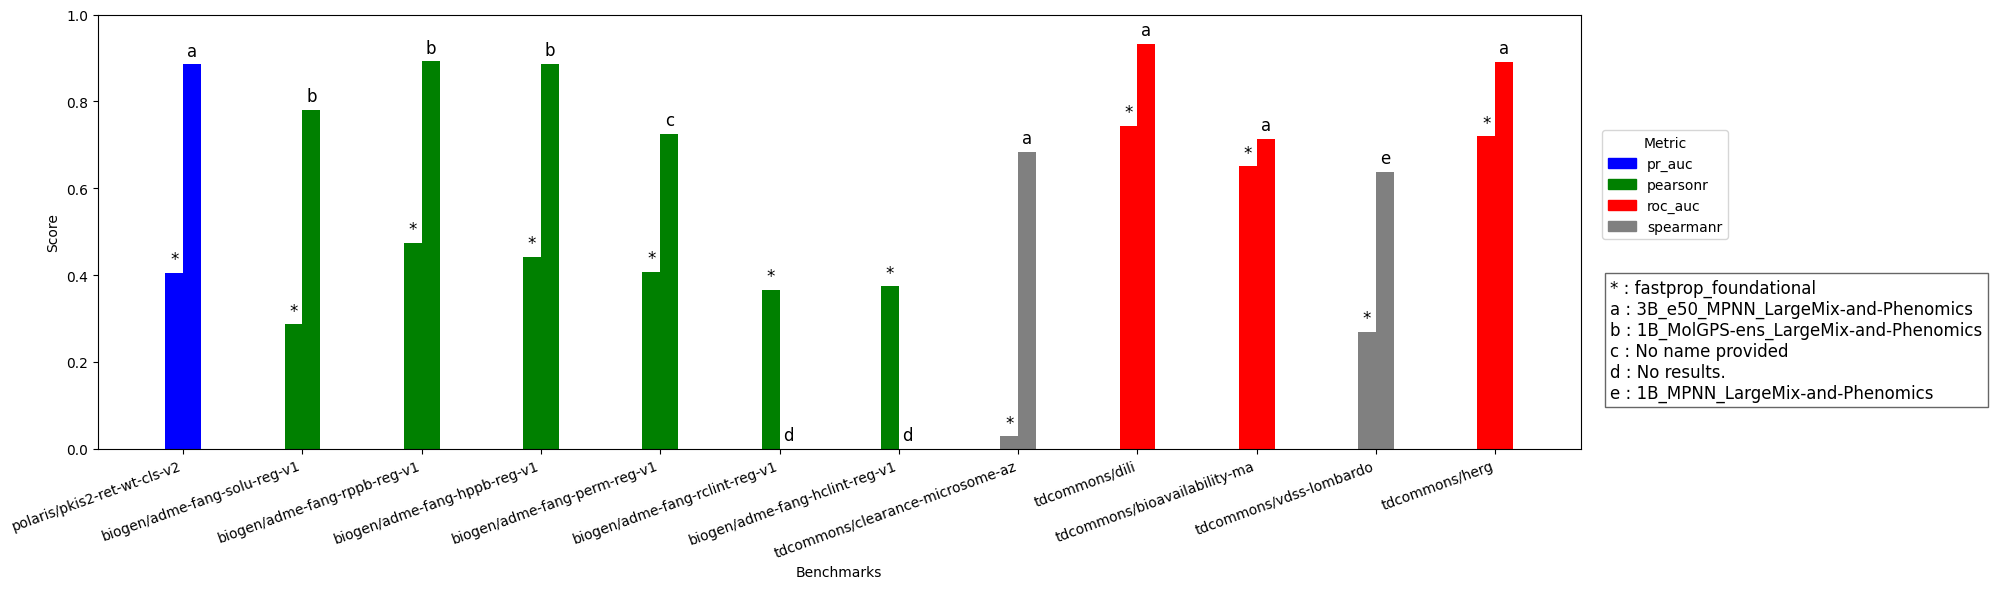

In [99]:
benchmarks = list(metadata.keys())
metrics = [d['metric'] for d in metadata.values()]
sota_name = [d['best_name'] for d in metadata.values()]
developing_values = [results_dict[b] for b in benchmarks]
sota_values = [best_models[b] for b in benchmarks]

# Assigning colors based on the metric
metric_colors = {'pr_auc': 'blue', 'pearsonr': 'green', 'roc_auc': 'red', 'spearmanr': 'grey'}
bar_colors = [metric_colors[metadata[b]['metric']] for b in benchmarks]

# Assign unique symbols for models
model_symbols = {}
model_symbols['fastprop_foundational'] = "*"
syms = iter('abcdefghijklmnopqrstuvwxyz')
for name in sota_name:
    if model_symbols.get(name, None) is None:
        model_symbols[name] = next(syms)

# Bar width and positioning
x = np.arange(len(benchmarks)) * 2  # Increased spacing between groups
width = 0.3 

# Plot bars
fig, ax = plt.subplots(figsize=(20, 6))
bars1 = ax.bar(x - width/2, developing_values, width, label="fastprop_foundation", color=bar_colors)
bars2 = ax.bar(x + width/2, sota_values, width, label="SOTA Model", color=bar_colors)

# Labels and titles
ax.set_xlabel("Benchmarks")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=20, ha="right")

# Add symbols on top of bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols['fastprop_foundational'], ha='center', fontsize=12, rotation=0)

for bar, model in zip(bars2, sota_name):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols[model], ha='center', fontsize=12, rotation=0)

# Legend for metrics
handles = [plt.Rectangle((0,0),1,1, color=color) for color in metric_colors.values()]
metric_labels = list(metric_colors.keys())
ax.legend(handles, metric_labels, title="Metric", bbox_to_anchor=(1.01, 0.75))

# Add symbol lookup legend
symbol_legend = '\n'.join([f"{sym} : {model}" for model, sym in model_symbols.items()])
plt.text(1.02, 0.25, symbol_legend, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.6))

# Show plot
plt.ylim((0.0, 1.0))
plt.tight_layout()
plt.show()